<a href="https://colab.research.google.com/github/Amirrezahmi/Video-Inpainting-and-Voice-Cloning/blob/main/video%20inpainting/image%20segmentation/sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Set up your environment
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-r7n00_2y
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-r7n00_2y
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=c35a2e3b56de577a275545ee44bb6730e69f766efe262121f9bea9d3703ebbf9
  Stored in directory: /tmp/pip-ephem-wheel-cache-vuw38hjm/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.3 MB/s eta 0:00:00


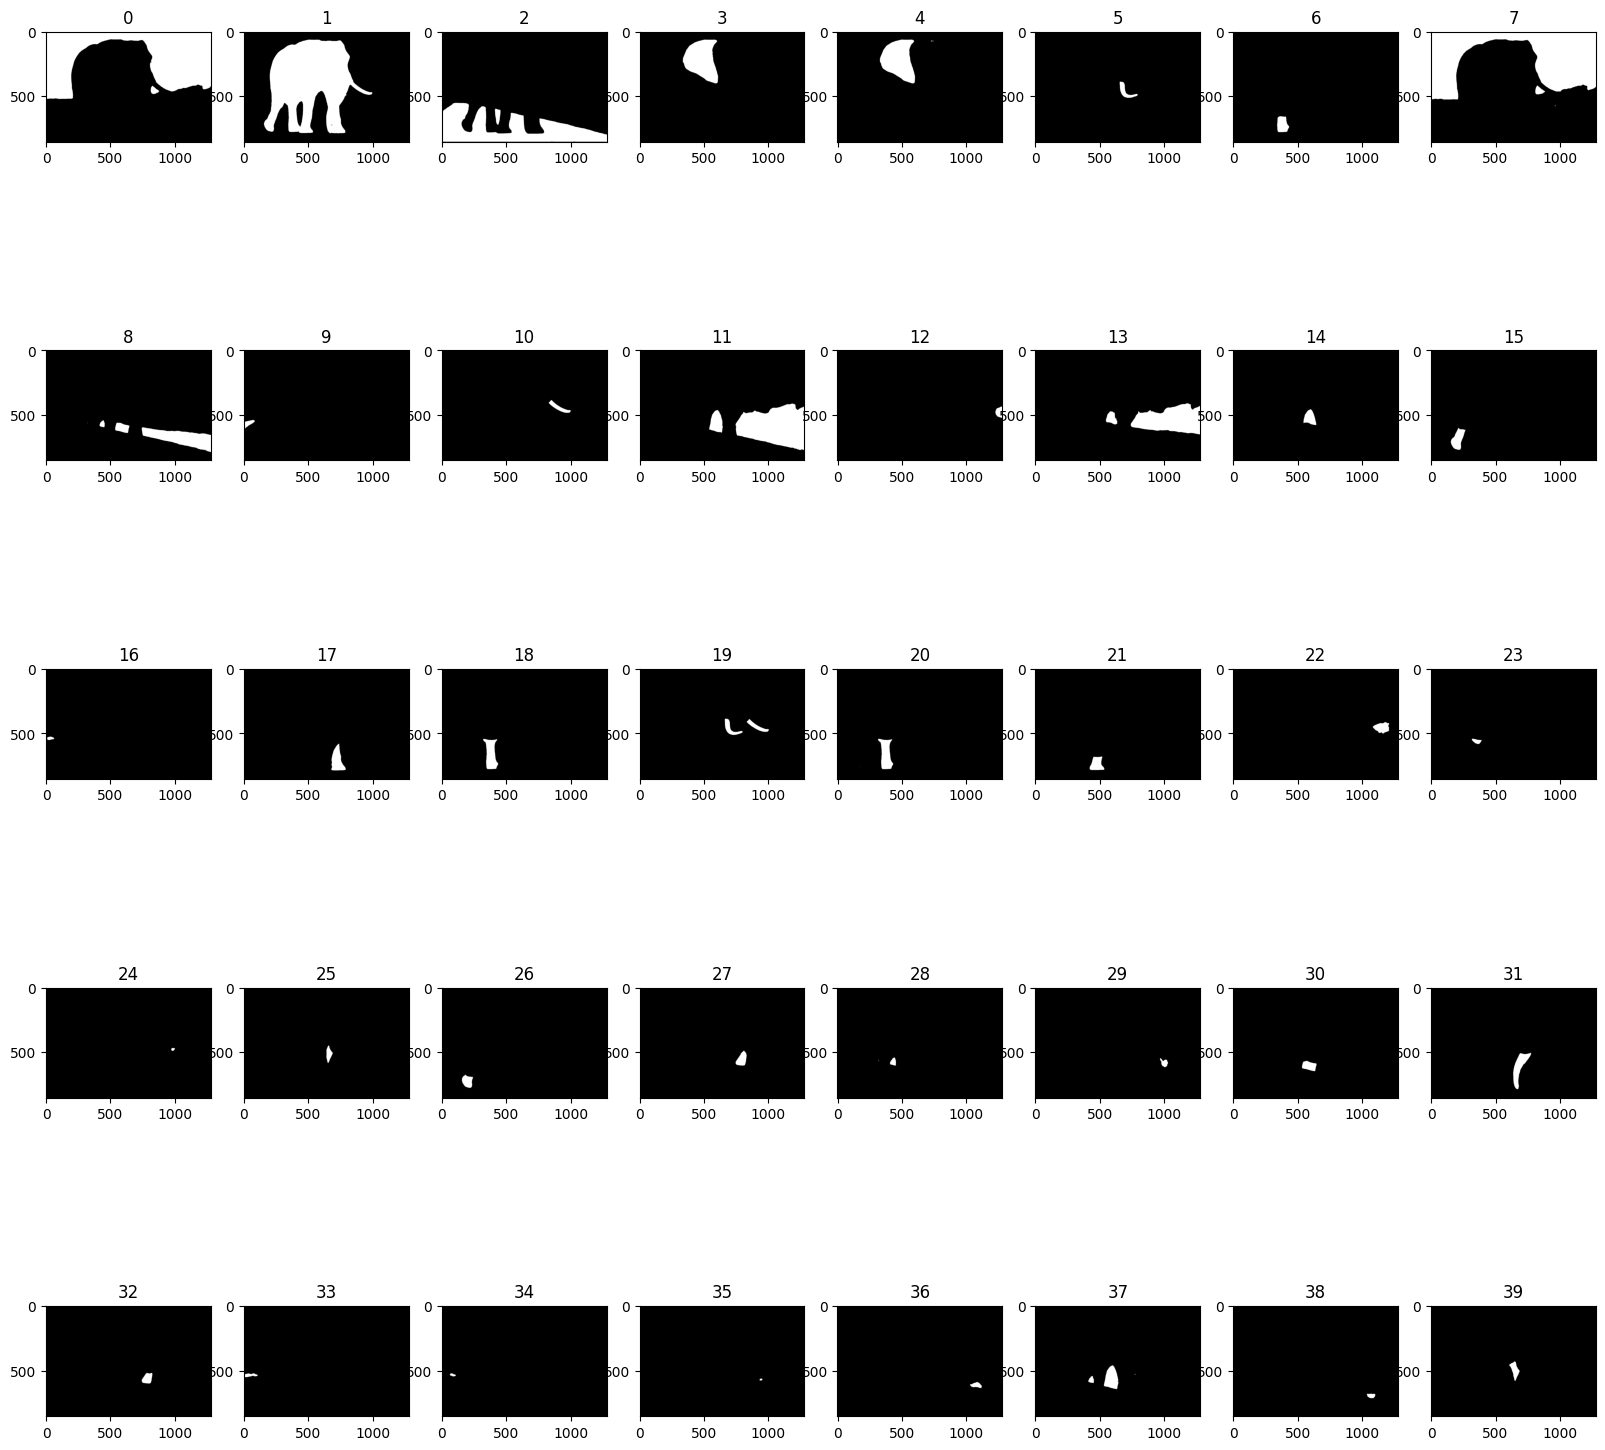

In [4]:
import torch
import numpy as np
from PIL import Image
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt

# Set up your environment
#!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
#!pip install -q roboflow supervision
#!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

# Load the model
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = 'sam_vit_h_4b8939.pth'
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

# Load the image
image_path = "/content/licensed-image.jpg"
image = Image.open(image_path)
image_np = np.array(image)

# Generate masks
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_np)  # Make sure this line is executed correctly

# Define the size of the grid
rows = 5
cols = 8

# Create a figure and a grid of subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

# Iterate over the masks and display each one on a separate subplot
for i, segmentation in enumerate(result):
    # Get the mask
    mask_array = segmentation['segmentation']

    # Calculate the row and column indices for the subplot
    row = i // cols
    col = i % cols

    # Display the mask on the subplot
    axs[row, col].imshow(mask_array, cmap='gray')

    # Add the index as the title of the subplot
    axs[row, col].set_title(f"{i}")

# Remove the empty subplots
for i in range(len(result), rows*cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axs[row, col])

plt.show()

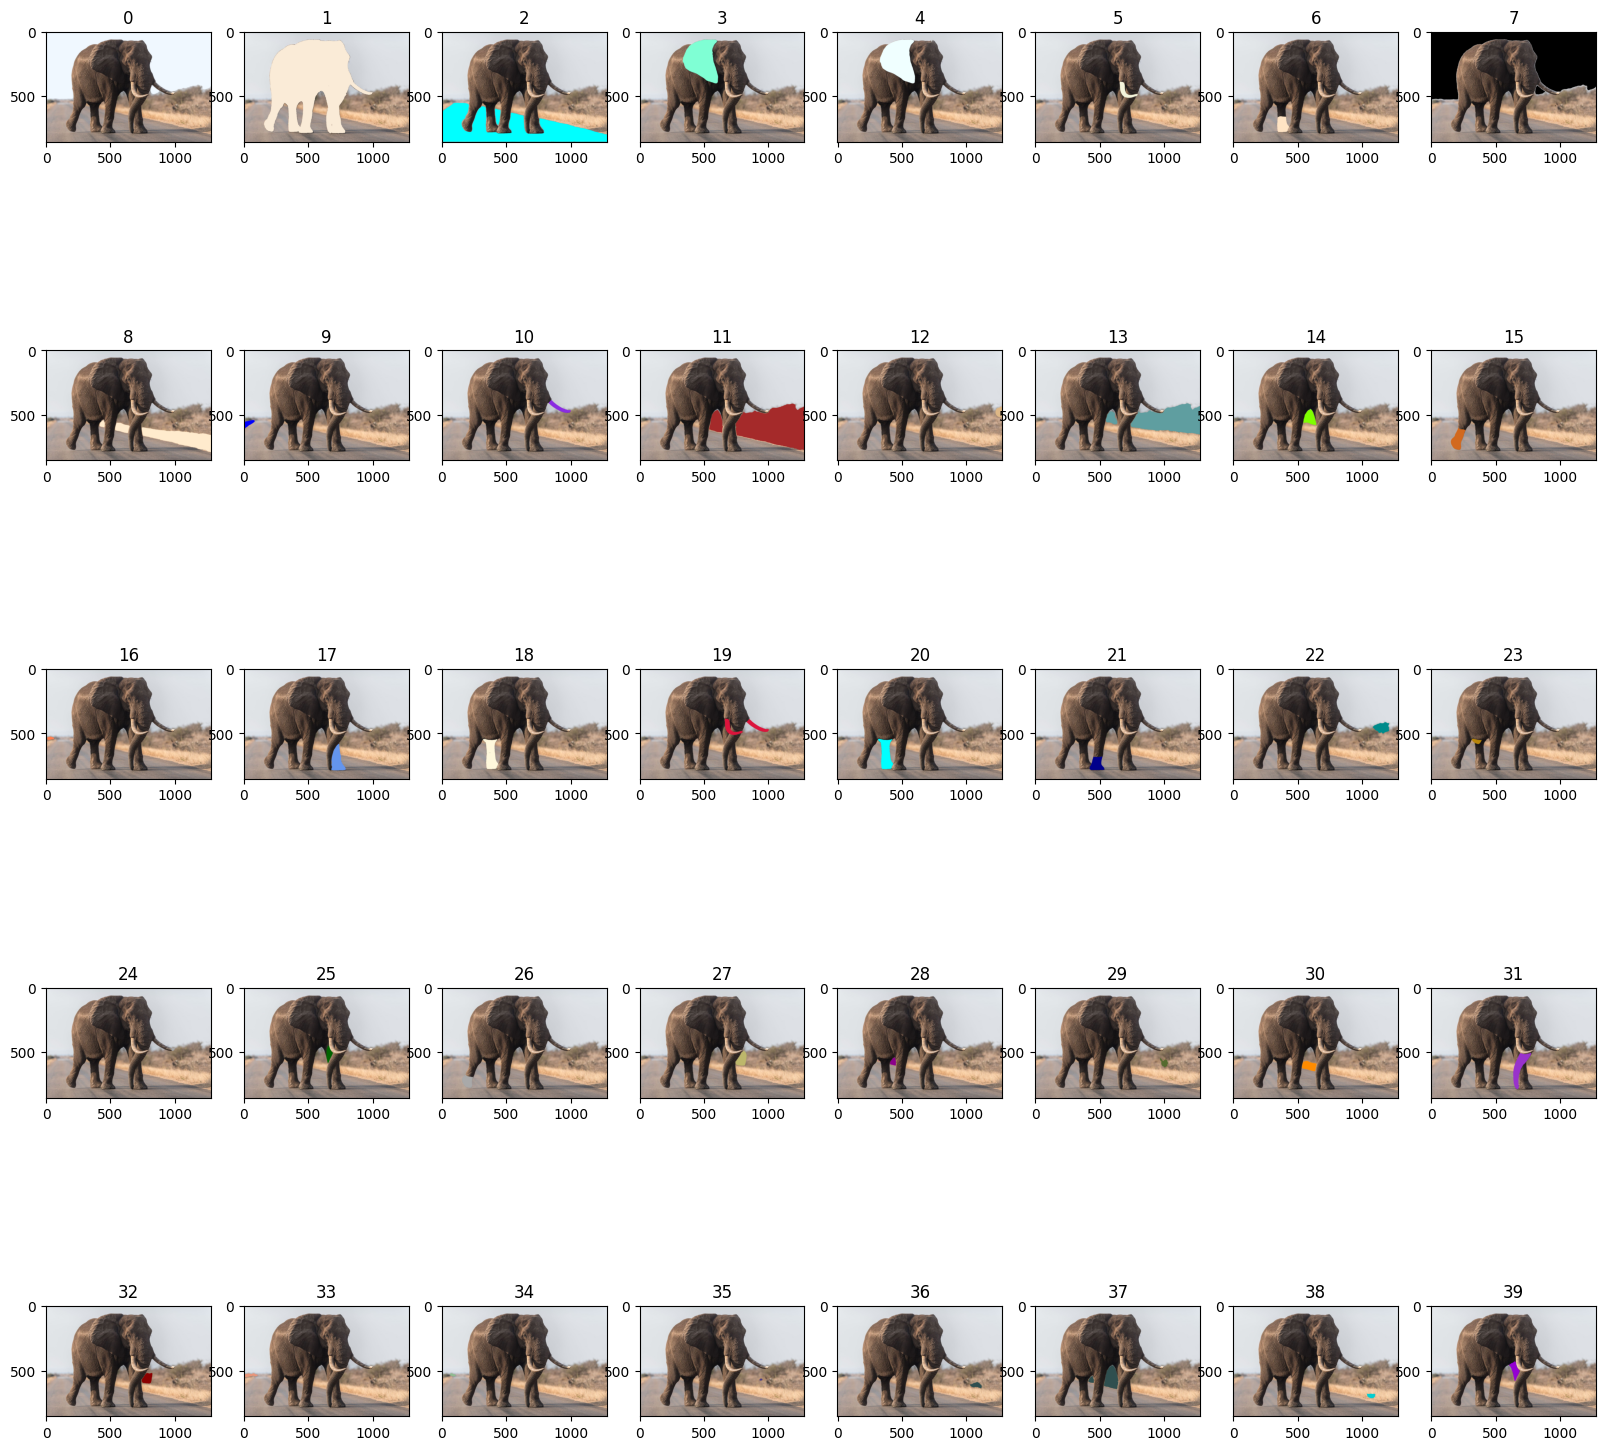

In [2]:
import torch
import numpy as np
from PIL import Image
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt
import cv2
import matplotlib.colors as mcolors

# Generate distinct colors for each mask
colors = list(mcolors.CSS4_COLORS.values())

def hex2rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))


# Set up your environment
#!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
#!pip install -q roboflow supervision
#!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

# Load the model
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = 'sam_vit_h_4b8939.pth'
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

# Load the image
image_path = "/content/licensed-image.jpg"
image = Image.open(image_path)
image_np = np.array(image)

# Generate masks
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_np)  # Make sure this line is executed correctly

# Define the size of the grid
rows = 5
cols = 8

# Create a figure and a grid of subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

# Iterate over the masks and display each one on a separate subplot
for i, segmentation in enumerate(result):
    # Get the mask
    mask_array = segmentation['segmentation']

    # Convert the mask to a 3-channel image
    mask_rgb = np.stack([mask_array]*3, axis=-1)

    # Convert the color from hexadecimal to RGB
    color_rgb = hex2rgb(colors[i % len(colors)])

    # Overlay the mask onto the original image with a distinct color
    overlay = np.where(mask_rgb, np.array(color_rgb), image_np)

    # Calculate the row and column indices for the subplot
    row = i // cols
    col = i % cols

    # Display the overlay on the subplot
    axs[row, col].imshow(overlay)

    # Add the index as the title of the subplot
    axs[row, col].set_title(f"{i}")


# Remove the empty subplots
for i in range(len(result), rows*cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axs[row, col])

plt.show()

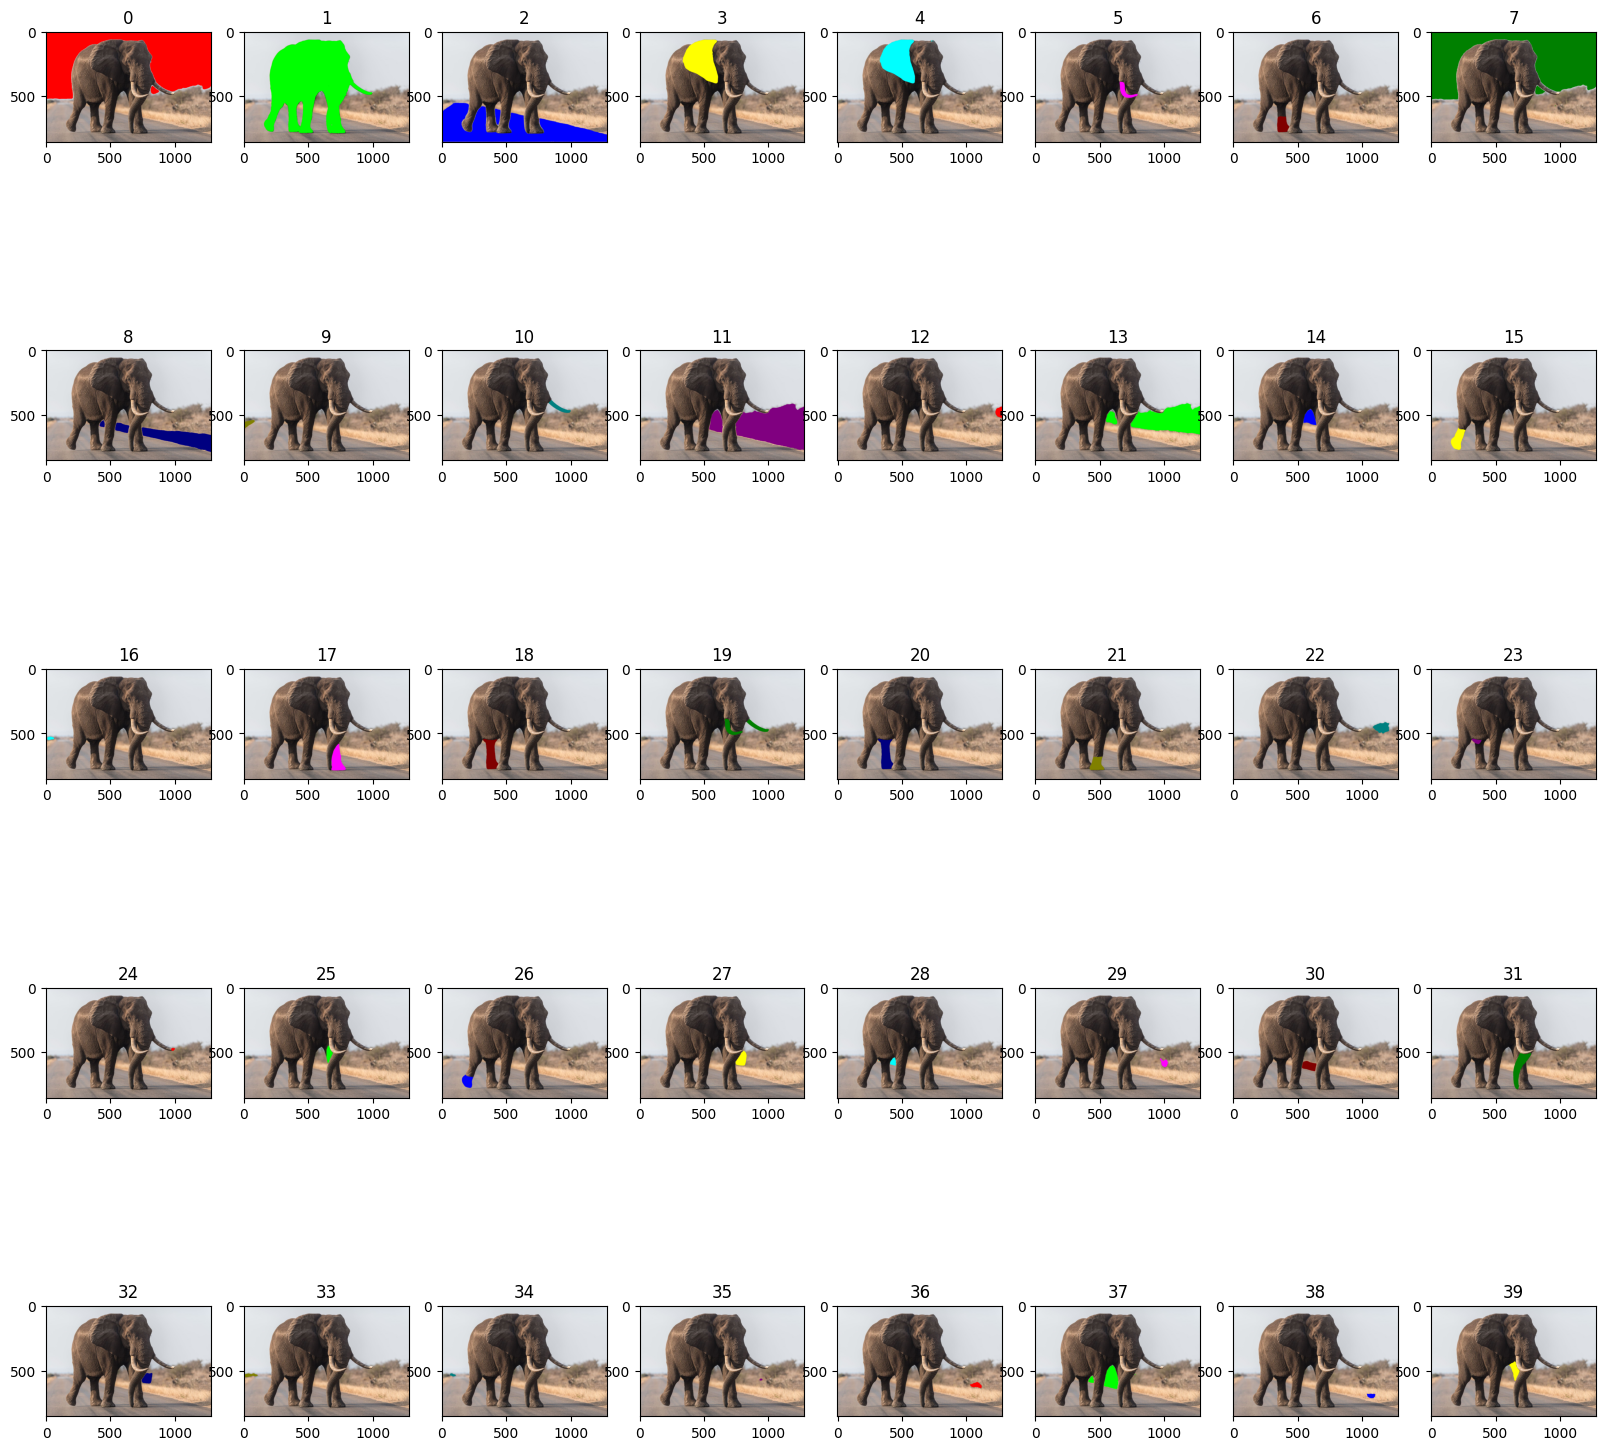

In [6]:
import torch
import numpy as np
from PIL import Image
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt
import cv2
import matplotlib.colors as mcolors

# Generate distinct colors for each mask
# Define a list of distinct colors
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255),
          (128, 0, 0), (0, 128, 0), (0, 0, 128), (128, 128, 0), (0, 128, 128), (128, 0, 128)]

def hex2rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))


# Set up your environment
#!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
#!pip install -q roboflow supervision
#!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

# Load the model
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = 'sam_vit_h_4b8939.pth'
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

# Load the image
image_path = "/content/licensed-image.jpg"
image = Image.open(image_path)
image_np = np.array(image)

# Generate masks
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_np)  # Make sure this line is executed correctly

# Define the size of the grid
rows = 5
cols = 8

# Create a figure and a grid of subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

# Iterate over the masks and display each one on a separate subplot
for i, segmentation in enumerate(result):
    # Get the mask
    mask_array = segmentation['segmentation']

    # Convert the mask to a 3-channel image
    mask_rgb = np.stack([mask_array]*3, axis=-1)

    # Get the color for the mask
    color_rgb = colors[i % len(colors)]

    # Overlay the mask onto the original image with a distinct color
    overlay = np.where(mask_rgb, color_rgb, image_np)

    # Calculate the row and column indices for the subplot
    row = i // cols
    col = i % cols

    # Display the overlay on the subplot
    axs[row, col].imshow(overlay)

    # Add the index as the title of the subplot
    axs[row, col].set_title(f"{i}")



# Remove the empty subplots
for i in range(len(result), rows*cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axs[row, col])

plt.show()

In [7]:
indices_input = '1' #input("Enter the indices of the labels to keep, separated by space: ")
indices = list(map(int, indices_input.split()))

# Initialize a binary mask with all zeros
combined_binary_mask = np.zeros_like(image_np[:,:,0])

for index in indices:
    # Get the mask
    mask_array = result[index]['segmentation']

    # Combine the binary masks using the logical OR operation
    combined_binary_mask = np.logical_or(combined_binary_mask, mask_array)

# Convert the combined binary mask to uint8
combined_binary_mask = combined_binary_mask.astype(np.uint8) * 255

# Create a transparent image
transparent_image = Image.new("RGBA", image.size, (0, 0, 0, 0))

# Paste the original image onto the transparent image using the combined binary mask
transparent_image.paste(image, (0, 0), mask=Image.fromarray(combined_binary_mask))

# Save or display the transparent image
transparent_image.save("transparent_image1.png")
transparent_image.show()

(-0.5, 1279.5, 853.5, -0.5)

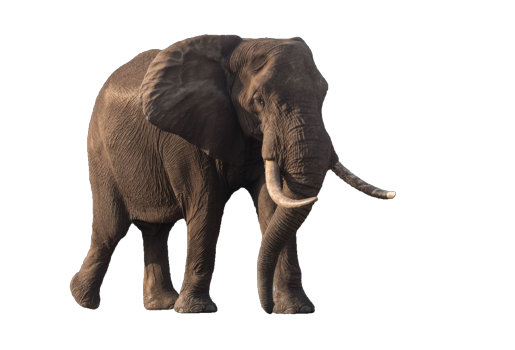

In [8]:
import matplotlib.pyplot as plt
img='/content/transparent_image1.png'
im= plt.imread(img)
plt.imshow(im)
plt.axis('off')